In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import csv
import pandas as pd

from tifffile import imsave, imread


In [18]:
detection = pd.read_csv('cell_detection_s3617_cutout.csv')
# print(detection)

In [19]:
centroids = detection[['X', 'Y', 'Slice']]
# centroids.rename(columns = {'Slice':'Z'}, inplace = True)
centroids.columns = ['x', 'y', 'z']
print(centroids)

          x       y   z
0    14.252  12.677  51
1     5.748  25.906  52
2    22.441  33.937  55
3    12.283  12.283  54
4    14.409  12.598  59
5    13.071  21.654  61
6     7.087  20.787  62
7     6.850  25.669  62
8    27.244  20.236  62
9    29.528  13.622  62
10   11.969  21.732  52
11   23.701  27.402  54
12   21.102  29.764  53
13   20.709  26.378  51
14   29.606  20.945  52
15   31.496  21.969  53
16   32.756  23.543  54
17   23.937   3.622  52
18   23.622  30.394  54
19   32.992  28.268  55
20    7.139  28.504  55
21   13.438  22.625  55
22   16.903  25.722  54
23   28.714  10.656  53
24   21.732  11.969  55
25    8.399  19.475  60
26    8.241  18.950  57
27   11.076  20.472  60
28   13.491  18.058  62
29   16.378  11.706  63
..      ...     ...  ..
203   6.929   7.034  26
204  16.220   8.399  35
205  14.488  10.656  35
206  28.451   9.396  36
207  28.504  10.761  45
208  28.819  14.856  45
209  30.551  12.861  42
210  18.373  13.858  22
211  28.084  16.168  23
212  25.722  16.

In [20]:
# z slices were 1 indexed, now make then 0
centroids['z'] -= 1
centroids['x'] *= (1000/39.37)
centroids['y'] *= (1000/39.37)

/Users/Kepler/anaconda/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Kepler/anaconda/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Kepler/anaconda/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [21]:
print(centroids)

              x           y   z
0    362.001524  321.996444  50
1    145.999492  658.013716  51
2    570.002540  862.001524  54
3    311.988824  311.988824  53
4    365.989332  319.989840  58
5    332.004064  550.012700  60
6    180.010160  527.990856  61
7    173.990348  651.993904  61
8    691.998984  513.995428  61
9    750.012700  345.999492  61
10   304.013208  551.993904  51
11   602.006604  696.012192  53
12   535.991872  756.007112  52
13   526.009652  670.002540  50
14   751.993904  532.004064  51
15   800.000000  558.013716  52
16   832.004064  597.993396  53
17   608.001016   91.998984  51
18   600.000000  772.009144  53
19   837.998476  718.008636  54
20   181.330963  724.003048  54
21   341.325883  574.676149  54
22   429.337059  653.340107  53
23   729.337059  270.662941  52
24   551.993904  304.013208  54
25   213.335027  494.665989  59
26   209.321819  481.330963  56
27   281.330963  519.989840  59
28   342.672085  458.674117  61
29   416.002032  297.332995  62
..      

In [82]:
df0 = centroids[centroids['x'] < 500]
df0 = df0[df0['y'] < 500] 
df0 = df0.reset_index(drop=True)


df1 = centroids[centroids['x'] >= 500]
df1 = df1[df1['y'] < 500] 
df1['x'] -= 500
df1 = df1.reset_index(drop=True)


df2 = centroids[centroids['x'] < 500]
df2 = df2[df2['y'] >= 500] 
df2['y'] -= 500
df2 = df2.reset_index(drop=True)


df3 = centroids[centroids['x'] >= 500]
df3 = df3[df3['y'] >= 500] 
df3['x'] -= 500
df3['y'] -= 500
df3 = df3.reset_index(drop=True)


In [83]:
print(df1)

             x           y   z
0   250.012700  345.999492  61
1   108.001016   91.998984  51
2   229.337059  270.662941  52
3    51.993904  304.013208  54
4    21.336043  157.327915  68
5    40.005080  388.011176  80
6    40.005080  105.334011  87
7    25.323851  353.340107  84
8    29.337059  324.003048  85
9   127.990856  154.660909  81
10   51.993904   51.993904  80
11  106.680213  400.000000  58
12  404.013208  102.667005  54
13  412.014224  105.334011  54
14  250.673101  262.661925  57
15  282.677165   83.997968  60
16  319.989840  440.005080  65
17  154.660909  358.674117  70
18  294.665989  358.674117  73
19  446.659893  472.009144  73
20  122.656845  109.321819  73
21  108.001016  494.665989  74
22  178.663957  322.656845  93
23  209.347219  489.331979  98
24   64.008128  288.011176   9
25   49.326899  397.332995  12
26  127.990856  337.338075  10
27  178.663957  164.008128  12
28  157.327915  129.337059  14
29  149.326899  142.672085  11
..         ...         ...  ..
38  230.

In [84]:
df0.to_csv('cell_detection_0.csv')

df1.to_csv('cell_detection_1.csv')

df2.to_csv('cell_detection_2.csv')

df3.to_csv('cell_detection_3.csv')

# Checking and plotting centroids

In [30]:
img_stack = imread('../s3617_cutout.tif')
# print(img_stack)

## Checking Cell Detection 1

In [61]:
s = img_stack[:,0:500,500:1000]
cd1 = pd.read_csv('cell_detection_1.csv')
print(cd1)

    Unnamed: 0           x           y   z
0            0  250.012700  345.999492  61
1            1  108.001016   91.998984  51
2            2  229.337059  270.662941  52
3            3   51.993904  304.013208  54
4            4   21.336043  157.327915  68
5            5   40.005080  388.011176  80
6            6   40.005080  105.334011  87
7            7   25.323851  353.340107  84
8            8   29.337059  324.003048  85
9            9  127.990856  154.660909  81
10          10   51.993904   51.993904  80
11          11  106.680213  400.000000  58
12          12  404.013208  102.667005  54
13          13  412.014224  105.334011  54
14          14  250.673101  262.661925  57
15          15  282.677165   83.997968  60
16          16  319.989840  440.005080  65
17          17  154.660909  358.674117  70
18          18  294.665989  358.674117  73
19          19  446.659893  472.009144  73
20          20  122.656845  109.321819  73
21          21  108.001016  494.665989  74
22         

    Unnamed: 0           x           y   z
40          40  201.346203  169.342139  46
41          41  190.678181  122.656845  46
43          43   38.658877  133.324867  46


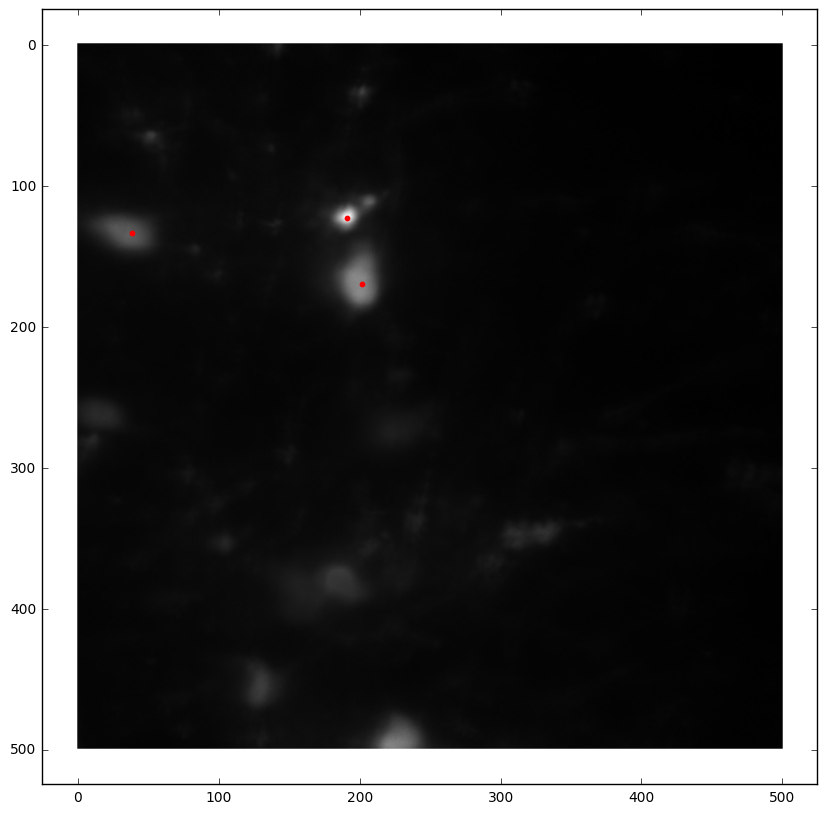

In [62]:
z_val = 46
cd1_slice = cd1[cd1['z'] == z_val]
print(cd1_slice)

plt.figure(figsize=(10, 10))
plt.imshow(s[z_val,:,:], cmap='gray')
plt.scatter(cd1_slice['x'], cd1_slice['y'], s=10, color='red')
plt.show()

## Checking cell_detection_2

In [66]:
s2 = img_stack[:,500:1000,0:500]
cd2 = pd.read_csv('cell_detection_2.csv')
print(cd2)

    Unnamed: 0           x           y   z
0            0  145.999492  158.013716  51
1            1  332.004064   50.012700  60
2            2  180.010160   27.990856  61
3            3  173.990348  151.993904  61
4            4  304.013208   51.993904  51
5            5  181.330963  224.003048  54
6            6  341.325883   74.676149  54
7            7  429.337059  153.340107  53
8            8  281.330963   19.989840  59
9            9  288.011176   41.325883  84
10          10  491.998984  274.676149  82
11          11  438.658877  100.000000  91
12          12  459.994920  186.664973  93
13          13  419.989840   72.009144  87
14          14  488.011176  305.334011  58
15          15  300.000000   88.011176  63
16          16  221.336043   49.326899  28
17          17  275.996952   13.335027  36
18          18  388.011176   42.672085  47
19          19  496.012192  202.667005  46
20          20  454.660909  211.988824   4
21          21   66.675133  130.657861  43
22         

   Unnamed: 0           x           y   z
2           2  180.010160   27.990856  61
3           3  173.990348  151.993904  61


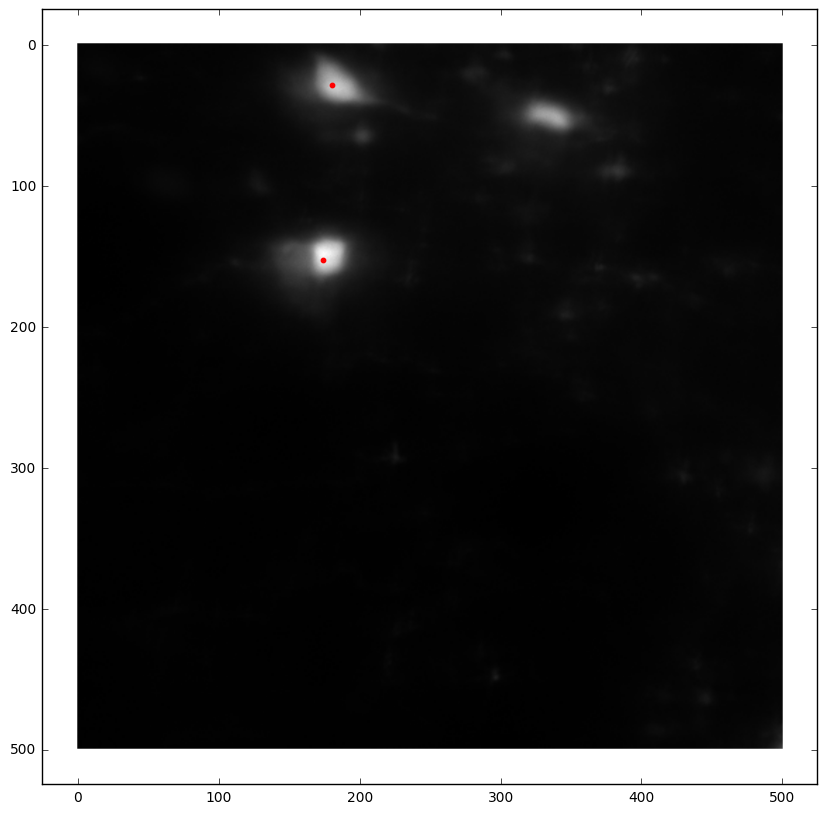

In [67]:
z_val = 61
cd2_slice = cd2[cd2['z'] == z_val]
print(cd2_slice)

plt.figure(figsize=(10, 10))
plt.imshow(s2[z_val,:,:], cmap='gray')
plt.scatter(cd2_slice['x'], cd2_slice['y'], s=10, color='red')
plt.show()

    Unnamed: 0           x           y  z
25          25  175.996952  383.997968  1
27          27  478.663957  377.343155  1


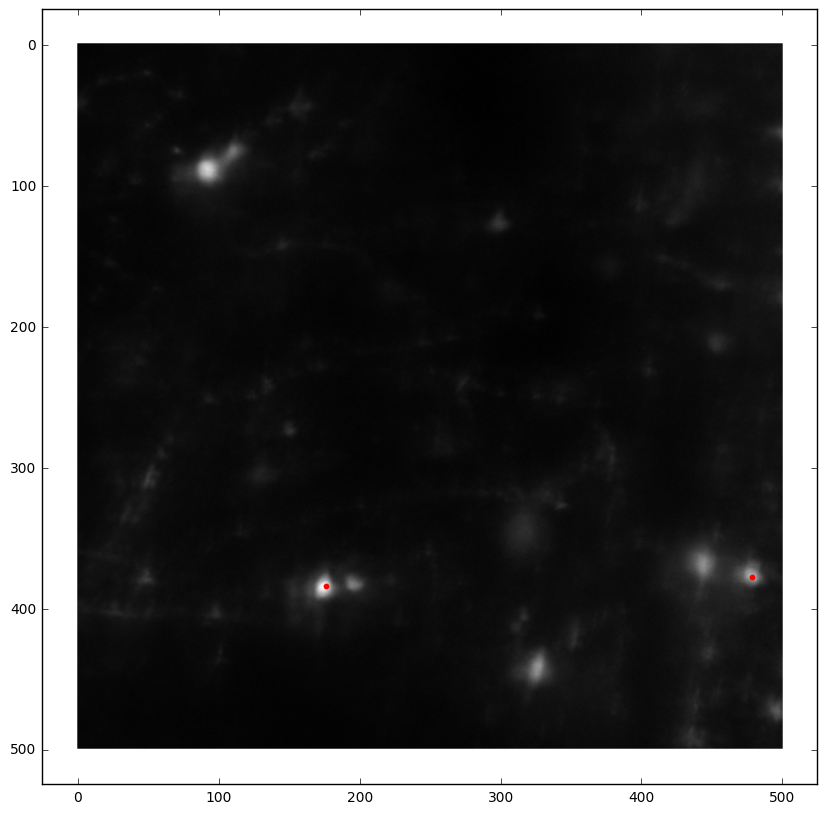

In [68]:
z_val = 1
cd2_slice = cd2[cd2['z'] == z_val]
print(cd2_slice)

plt.figure(figsize=(10, 10))
plt.imshow(s2[z_val,:,:], cmap='gray')
plt.scatter(cd2_slice['x'], cd2_slice['y'], s=10, color='red')
plt.show()
